In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Afectation of dataset size on the accuracy

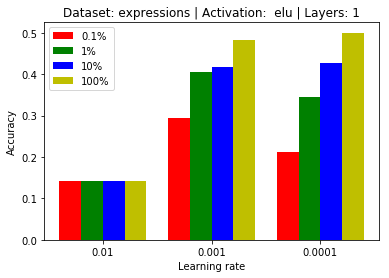

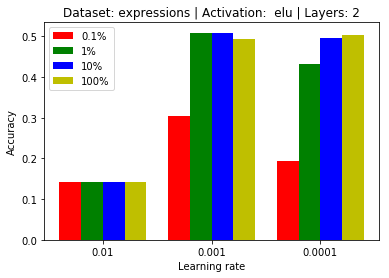

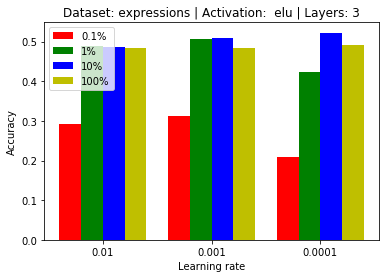

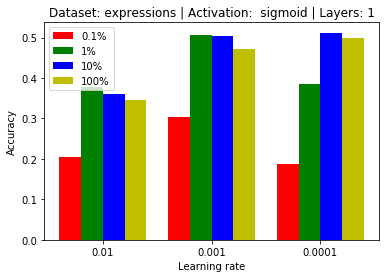

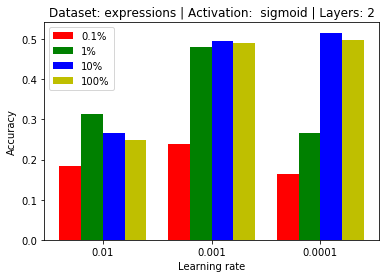

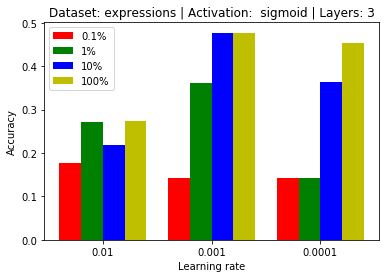

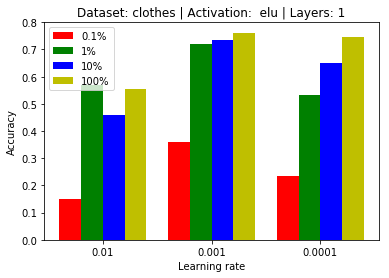

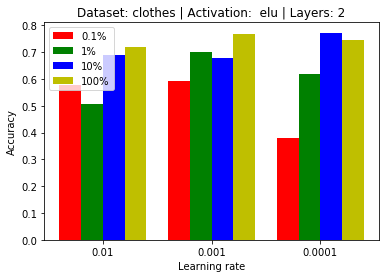

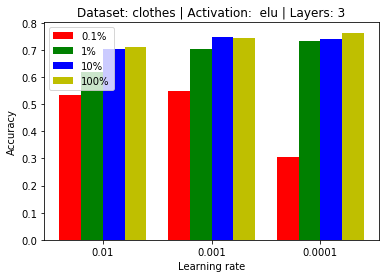

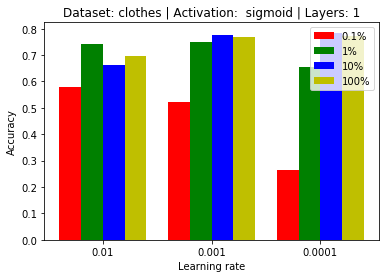

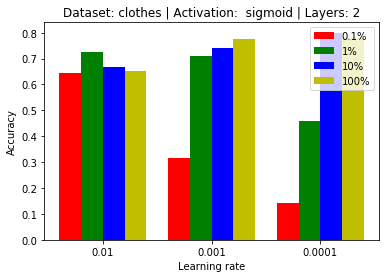

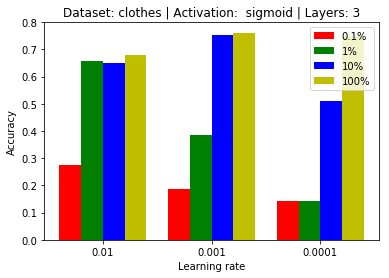

In [125]:
def sizes_vs_accuracy(dataset, activation, model):
    
    df = pd.read_csv('./baseline_deep_features_analysis.txt', sep=",")
    df = df.loc[df['Dataset'] == dataset]
    df = df.loc[df['Activation'] == activation]
    df = df.loc[df['Model'] == model]
    
    lrs = np.unique(df.values[:,0]) # learning rate values
    lrs = np.flip(np.sort(lrs), 0)
    ind = len(lrs)
    dss = np.unique(df.values[:,2]) # dataset sizes
    colors = ['r', 'g', 'b', 'y']
    
    width = 0.2
    fig, ax = plt.subplots()
    
    rects = []
    for i, size in enumerate(dss):
        c_df = df.loc[df['Dataset size'] == size]
        accuracies_per_size = c_df.values[:,5]
        #accuracies_per_size = np.sort(accuracies_per_size)
        x = np.arange(len(accuracies_per_size)) +  0.2*i
        rect = ax.bar(x, accuracies_per_size, width, color=colors[i])
        rects.append(rect)
    
    ax.legend(rects, ["0.1%", "1%", "10%", "100%"])
    ax.set_xticks([0.30, 1.3, 2.3])
    ax.set_xticklabels(lrs)
    ax.set_xlabel('Learning rate')
    ax.set_ylabel('Accuracy')
    ax.set_title("Dataset: {:s} | Activation: {:s} | Layers: {:d}".format(dataset, activation, int(model)))

for d in ["expressions", "clothes"]:
    for a in [" elu", " sigmoid"]:
        for i in [1.0, 2.0, 3.0]:
            sizes_vs_accuracy(d, a, i)

